In [59]:
''' 
AREA_output_statistics.ipynb 
By Natalie Bratset

This notebook reads the AREA output file and generates a bunch of statistics based on that output. 
Make sure to change the export_folder variable to your exports folder!

I'm planning to convert this to a .py file after writing/testing in this notebook.
'''

import os
import pandas as pd
import numpy as np
import matplotlib.patches as mplpatches
import matplotlib.pyplot as plt
# from scipy import stats
# from scipy.interpolate import splrep, splev
# import plotly.express as px

area_results_path = os.path.expanduser("/scratch/Shares/dowell/temp/ChrisO/PSEA/AREA_fast/output/AREA_output/all_chrom_comorbidthreshold0/area_scores_20250808-192325.adjpval.csv")  # Update with AREA rsults we want to look at
gene_ref_path = os.path.expanduser("/scratch/Shares/dowell/temp/ChrisO/PSEA/AREA/testdata/genes.csv")
export_folder = "/Users/nabr7467/projects/AREA_LE/AREA_output_statistics/" # Change this to your export folder

area_results = pd.read_csv(area_results_path)
gene_ref = pd.read_csv(gene_ref_path)


In [60]:
################################## USER INPUTS HERE ###########################################

# this is for setting p_val cutoffs and whatnot
# P value Columns: pval,p_value_bonf,p_value_holm,p_value_BenjaminiHochberg,p_value_BenjaminiYekutieli

##############################################################################################

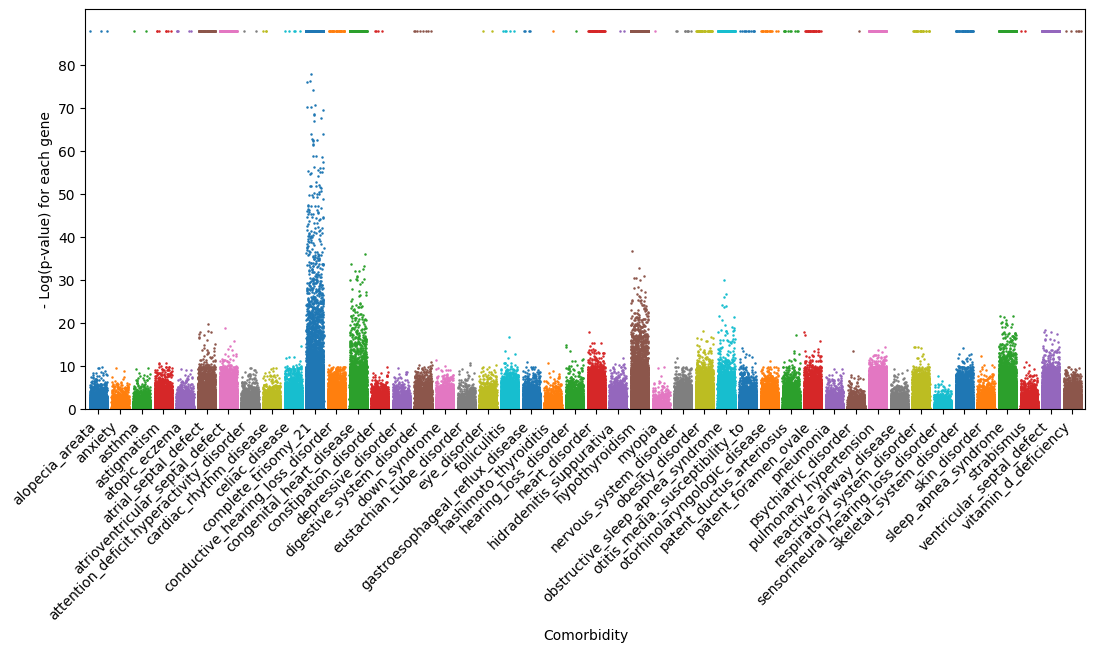

In [66]:
def minus_log_pval(df, col):
    '''Calculates -log10 of specified pvalue column and exports the given dataframe with a new 'minuslog10pvalue' column.
       This function handles pval=0 by finding the smallest non-zero p-value and treating all 0 p-values to the (smallest p-value) x (10^-10).
       Inputs: df - AREA dataframe containing p-values 
              col - Column name with the pvalues you want to convert'''
   
    df['marker'] = '.' 
    
    if 0 in area_results[col]:                                               # checks for a 0 pvalue to handle
        df.loc[df[col] == 0.0, 'marker'] = 'v'
        min_nonzero_pval = np.min(area_results[col][area_results[col] != 0]) # finds the minimum pvalue that is not 0
        adjusted_pval = min_nonzero_pval/(10**10)                            # this value is the adjusted pvalue for AREA results with a pvalue of 0. This is such that we can take the -log10(pval)
        df.loc[df[col] == 0, col] = adjusted_pval                            # change 0s to a smaller val than minimum
    
    df['minuslog10pvalue'] = -np.log10(df[col])
    
    return df

def sum_comorbids():
    pass

def custom_manhattan_plot(df, group_col, pval_col, ignore, export):
    '''Creates a manhattan plot using a dataframe containing a column for groups to split up, and plots the -log10(pval) column.'''
    df[group_col] = df[group_col].str.lower()           # makes everything lowercase for read-ablility
    df = df.sort_values(group_col)
    df_grouped = df.groupby((group_col),observed=False) # groups dataframe by group_col (comorbidity)
    
    # Set Up Figure
    figureHeight=8
    figureWidth=14

    plt.figure(figsize=(figureWidth,figureHeight),facecolor='white')

    panelHeight=4
    panelWidth=10

    relativePanelWidth=panelWidth/figureWidth
    relativePanelHeight=panelHeight/figureHeight

    panel1=plt.axes([1/figureWidth,2/figureHeight,relativePanelWidth,relativePanelHeight])
    
    x_labels = []
    x_labels_pos = []
    for num, (name, group) in enumerate(df_grouped):
        x_labels.append(name)
        x_labels_pos.append(num*2)
        random_x_floats = np.random.uniform((num*2)-0.8,(num*2)+0.8,len(group[pval_col]))
        group.reset_index(inplace=True)
        panel1.scatter(random_x_floats, group[pval_col],marker='.',s=2.5)
    
    panel1.set_xticks(x_labels_pos)
    panel1.set_xticklabels(x_labels, rotation=45, ha='right')

    panel1.set_yticks(np.arange(0,np.max(df[pval_col]),10))
    
    panel1.set_xlim(-1.2,len(df_grouped)*2-0.8)
    panel1.set_ylim(0,np.max(df[pval_col])+5)
    
    panel1.set_xlabel('Comorbidity')
    panel1.set_ylabel('- Log(p-value) for each gene')
    
    plt.savefig(f'{export}manhattan_plot_all_chr.png',dpi=600)
    plt.show()

## MAIN ##
df = minus_log_pval(area_results,'p_value_bonf')
custom_manhattan_plot(df,'binary_attribute','minuslog10pvalue',[], export_folder) 


### i want to add counts for # 0-pval
    ### maybe plot number on graph 0-0

